## 特征值和特征向量

对于n阶方阵A，如果存在数a和非零n维列向量x，使得Ax=ax，则称a是矩阵A的一个特征值，x是矩阵A属于特征值a的特征向量

```python
#已知n阶方阵A， 求特征值与特征数组
# eigvals: 特征值数组
# eigvecs: 特征向量数组 
eigvals, eigvecs = np.linalg.eig(A)
#已知特征值与特征向量，求方阵
S = np.mat(eigvecs) * np.mat(np.diag(eigvals)) * np.mat(eigvecs逆) 
```

In [3]:
import numpy as np
A = np.mat('3 -2; 1 0')
print(A)
eigvals, eigvecs = np.linalg.eig(A)
print(eigvals)
print(eigvecs)
print(A * eigvecs[:, 0])	# 方阵*特征向量
print(eigvals[0] * eigvecs[:, 0])	#特征值*特征向量
S = np.mat(eigvecs) * np.mat(np.diag(eigvals)) * np.mat(eigvecs.I)
print(A * eigvecs)
print(np.diag(eigvals)*eigvecs)
print(S)


[[ 3 -2]
 [ 1  0]]
[2. 1.]
[[0.89442719 0.70710678]
 [0.4472136  0.70710678]]
[[1.78885438]
 [0.89442719]]
[[1.78885438]
 [0.89442719]]
[[1.78885438 0.70710678]
 [0.89442719 0.70710678]]
[[1.78885438 1.41421356]
 [0.4472136  0.70710678]]
[[ 3.00000000e+00 -2.00000000e+00]
 [ 1.00000000e+00 -4.05861454e-17]]


(800, 800)
(800, 800)


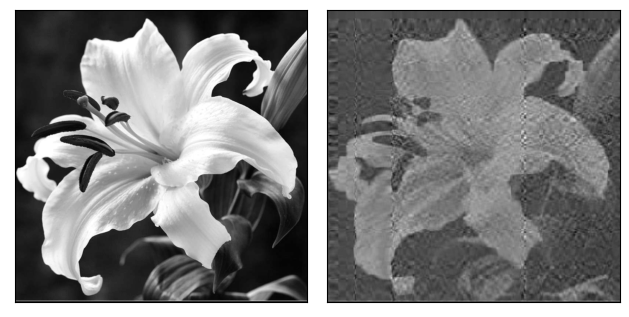

In [2]:
import numpy as np
from imageio.v2 import imread  # v3中没有as_gray参数
import matplotlib.pyplot as mp


original = imread('lily.jpg',as_gray=True)
print(original.shape)
original
#提取特征值
eigvals, eigvecs = np.linalg.eig(original)
eigvals[50:] = 0
print(np.diag(eigvals).shape)
original2 = np.mat(eigvecs) * np.mat(np.diag(eigvals)) * np.mat(eigvecs).I
# original2 = original2.astype(float) #不转换的话是复数，与下面语句实现同样的效果，即舍弃虚数部分
original2=original2.real
mp.figure("Lily Features")
mp.subplot(121)
mp.xticks([])
mp.yticks([])
mp.imshow(original, cmap='gray')

mp.subplot(122)
mp.xticks([])
mp.yticks([])
mp.imshow(original2, cmap='gray')
mp.tight_layout()
mp.show()


## 奇异值分解

有一个矩阵M，可以分解为3个矩阵U、S、V，使得U x S x V等于M。U与V都是正交矩阵（乘以自身的转置矩阵结果为单位矩阵）。那么S矩阵主对角线上的元素称为矩阵M的奇异值，其它元素均为0。

<strong>奇异值的效果要比特征值更好</strong>



In [4]:
import numpy as np
M = np.mat('4 11 14; 8 7 -2')
print(M)
U, sv, V = np.linalg.svd(M, full_matrices=False)
print(U * U.T)
print(V * V.T)
print(sv)
S = np.diag(sv)
print(S)
print(U * S * V)

[[ 4 11 14]
 [ 8  7 -2]]
[[ 1.00000000e+00 -7.27396709e-17]
 [-7.27396709e-17  1.00000000e+00]]
[[1.00000000e+00 3.08395285e-16]
 [3.08395285e-16 1.00000000e+00]]
[18.97366596  9.48683298]
[[18.97366596  0.        ]
 [ 0.          9.48683298]]
[[ 4. 11. 14.]
 [ 8.  7. -2.]]


(800, 800) (800,) (800, 800)


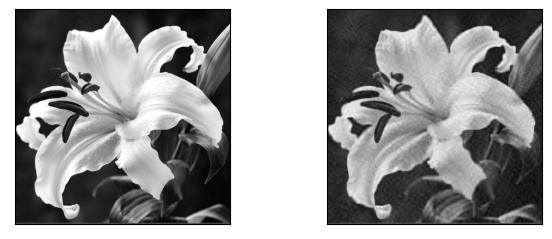

In [7]:

original = imread('lily.jpg', as_gray=True)
#提取奇异值  sv 	
U, sv, V = np.linalg.svd(original)
print(U.shape, sv.shape, V.shape)
sv[50:] = 0
original2 = np.mat(U) * np.mat(np.diag(sv)) * np.mat(V)
mp.figure("Lily Features")
mp.subplot(221)
mp.xticks([])
mp.yticks([])
mp.imshow(original, cmap='gray')

mp.subplot(222)
mp.xticks([])
mp.yticks([])
mp.imshow(original2, cmap='gray')
mp.tight_layout()